# Introduction
We will create a K-means class from scratch. We will implement the algorithm using only the minimum library such as NumPy.



In [49]:
# predefines and imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Problem 1
Determining init center points

In [50]:
from sklearn.datasets import make_blobs
np.random.seed(0)
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [51]:
def random_center(X,k, verbose = False):
    choosen_indexes = np.sort(np.random.choice(np.arange(X.shape[0]), size = k, replace = False))
    if verbose: print('Center index Choice: ',choosen_indexes)
    return X[choosen_indexes]
print('Data shape: ', X.shape)
n_clusters = 5

centers = random_center(X,5, verbose = True)
print('Centers: ',centers)


Data shape:  (100, 2)
Center index Choice:  [ 2 26 55 75 86]
Centers:  [[ 1.35678894  4.36462484]
 [-0.565433    3.65813966]
 [-1.26041884  7.46644456]
 [ 1.40848818  3.93270482]
 [ 1.60161834  0.92363636]]


# Problem 2
Sum Square Error

Chosen centers:  [[1 1]
 [3 6]]
SSE:  2


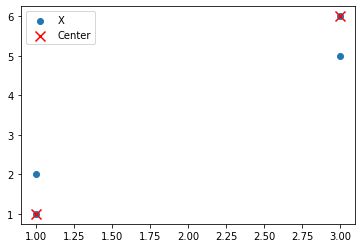

In [52]:
def sse(X,C, assigned_labels):
    sum_error = 0
    for label, center in enumerate(C):
        sum_error += np.where(assigned_labels == label, 1, 0).reshape(-1,1) * (X - center.reshape(1,-1))**2
    return sum_error.sum()
sse_x = np.array([
    [1,1],
    [1,2],
    [3,5],
    [3,6],
])
np.random.seed(123)
sse_center = random_center(sse_x,2)
print('Chosen centers: ', sse_center)
assigned_labels = np.array([0,0,1,1,])
print('SSE: ', sse(sse_x, sse_center,assigned_labels))

plt.scatter(sse_x[:,0], sse_x[:,1], label = 'X')
plt.scatter(sse_center[:,0], sse_center[:,1], marker = 'x', s = 100, color = 'red', label = 'Center')
plt.legend()
plt.show()

# Problem 3
Allocation to cluster

In [53]:
from numpy.linalg import norm
def allocate_to_cluster(X,C, verbose = False):
    distance = np.zeros((X.shape[0], C.shape[0]))
    for label, center in enumerate(C):
        distance[:,label] = norm(X - center.reshape(1, -1), axis = 1)
    if verbose: print('Distance: \n',distance)
    return np.argmin(distance, axis = 1)
print('X')
print(sse_x)
print('Centers')
print(sse_center)
print('Result')
print('Allocation: ',allocate_to_cluster(sse_x,sse_center,verbose = True))

X
[[1 1]
 [1 2]
 [3 5]
 [3 6]]
Centers
[[1 1]
 [3 6]]
Result
Distance: 
 [[0.         5.38516481]
 [1.         4.47213595]
 [4.47213595 1.        ]
 [5.38516481 0.        ]]
Allocation:  [0 0 1 1]


# Simple data for later testing

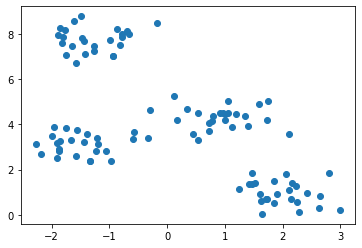

In [54]:
np.random.seed(0)
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X[:,0],X[:,1])

# Problem 4
Movement of the center point

In [55]:
def move_centers(X, assigned_label, k):
    new_centers = []
    for label in range(k):
        cluster = X[assigned_label == label]
        new_centers.append(np.average(cluster, axis = 0))
    return np.array(new_centers)
        

## Testing out centroid assignment

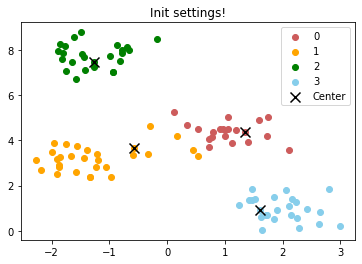

In [56]:
np.random.seed(0)
k = 4
init_centroids = random_center(X,4)
init_labels = allocate_to_cluster(X,init_centroids)

cluster_color = ['indianred', 'orange', 'green', 'skyblue']
for i in range(k):
    plt.scatter(X[init_labels == i][:,0], X[init_labels == i][:,1],c=cluster_color[i], label = str(i))
plt.scatter(init_centroids[:,0], init_centroids[:,1], marker = 'x', s = 100, color = 'black', label = 'Center')
plt.legend()
plt.title('Init settings!')
plt.show()

New centers:
[[ 1.06148307  4.39922699]
 [-1.24587768  3.22980708]
 [-1.26811733  7.76378266]
 [ 1.99186903  0.96561071]]


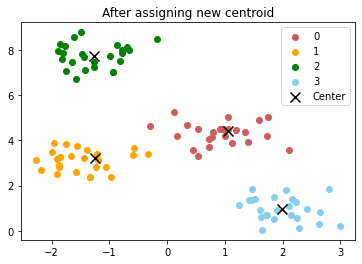

In [57]:
new_centers = move_centers(X,init_labels,k)
new_labels = allocate_to_cluster(X,new_centers)

print('New centers:')
print(new_centers)

for i in range(k):
    plt.scatter(X[new_labels == i][:,0], X[new_labels == i][:,1],c=cluster_color[i], label = str(i))
plt.scatter(new_centers[:,0], new_centers[:,1], marker = 'x', s = 100, color = 'black', label = 'Center')
plt.legend()
plt.title('After assigning new centroid')
plt.show()

# Problem 5
Repeat

In [58]:
def plot_clusters(X, centroids, labels, x_test = None, y_test = None, k=4, title = 'Clustering Status'):
    cluster_color = ['indianred', 'orange', 'green', 'skyblue', 'brown', 'blue','red','black']
    for i in range(k):
        plt.scatter(X[labels == i][:,0], X[labels == i][:,1],c=cluster_color[i], label = str(i), alpha = 0.5)
    plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s = 100, color = 'black', label = 'Center')
    
    if x_test is not None:
        for i in range(k):
            plt.scatter(x_test[y_test == i][:,0], x_test[y_test == i][:,1],c=cluster_color[i], label = 'test '+str(i), marker = '.')
    plt.legend()
    plt.title(title)
    plt.show()


Init Settings:
SS-Error:  84.33640249455568


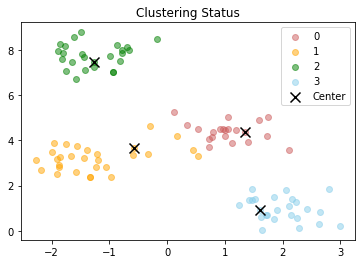

Ilteration:  0
SS-Error:  50.912773104155825


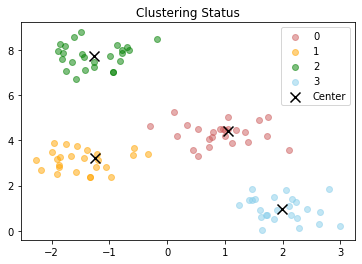

Ilteration:  1
SS-Error:  48.63378320706403


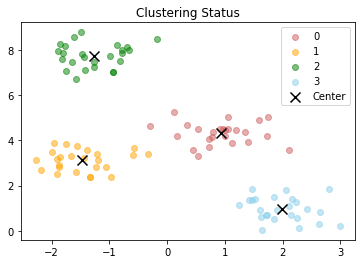

Ilteration:  2
SS-Error:  48.63378320706403


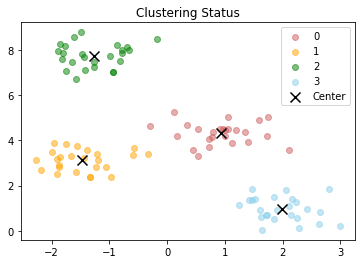

Ilteration:  3
SS-Error:  48.63378320706403


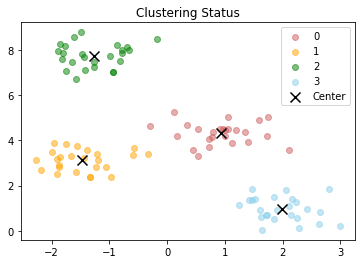

Ilteration:  4
SS-Error:  48.63378320706403


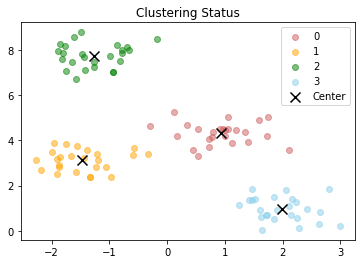

(array([[ 0.92578447,  4.32475792],
        [-1.47935679,  3.11716896],
        [-1.26811733,  7.76378266],
        [ 1.99186903,  0.96561071]]),
 array([0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 0, 2,
        1, 3, 0, 1, 1, 0, 3, 3, 3, 2, 3, 3, 1, 0, 2, 3, 2, 1, 0, 1, 2, 1,
        1, 2, 3, 1, 0, 0, 0, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 3, 3, 0, 3, 2,
        1, 1, 3, 0, 2, 3, 0, 2, 0, 0, 1, 1, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3,
        0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0], dtype=int64),
 48.63378320706403)

In [59]:
np.random.seed(0)
# X, _ = make_blobs(n_samples=10, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)
# plt.scatter(X[:,0],X[:,1])
# plt.show()
max_iter = 5
tolerance = 1e-4
k = 4
verbose = True
plotting = True
#init
def k_mean_train_test(X,k,max_iter,tolerance,verbose,plotting, seed):
    np.random.seed(seed)
    centroids = random_center(X,4)
    labels = allocate_to_cluster(X,centroids)
    if verbose:
            print('Init Settings:')
            print('SS-Error: ', sse(X,centroids,labels))
            if plotting: plot_clusters(X,centroids,labels)

    for i in range(max_iter):
        centroids = move_centers(X,labels,k)
        labels = allocate_to_cluster(X,centroids)
        error = sse(X,centroids,labels)
        if verbose:
            print('Ilteration: ', i)
            print('SS-Error: ', error)
            if plotting: plot_clusters(X,centroids,labels)
        if sse(X,centroids,labels) <= tolerance: break
    return centroids, labels, error
k_mean_train_test(X,k,max_iter,tolerance,verbose,plotting, 0)
    

### NOTE: it can be seen that the model converges in just 3 ilterations

# Problem 6
Calculate with different init values

Test with seed:  0
Final Error:  48.63378320706403
Final Cluster: 


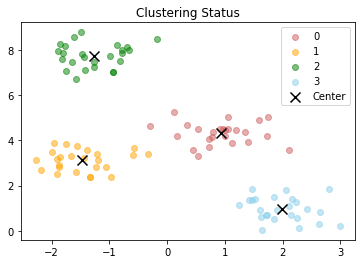

Test with seed:  1
Final Error:  132.22875558038203
Final Cluster: 


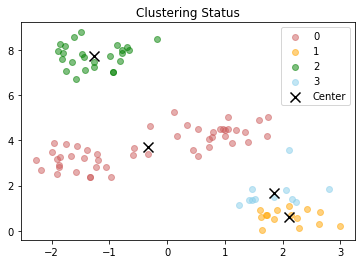

Test with seed:  2
Final Error:  48.63378320706403
Final Cluster: 


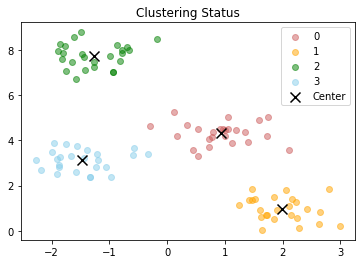

Test with seed:  3
Final Error:  48.63378320706403
Final Cluster: 


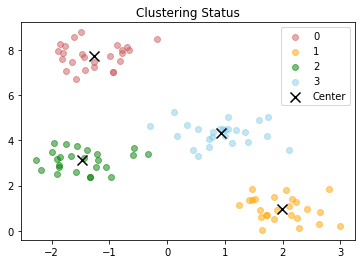

Test with seed:  4
Final Error:  48.63378320706403
Final Cluster: 


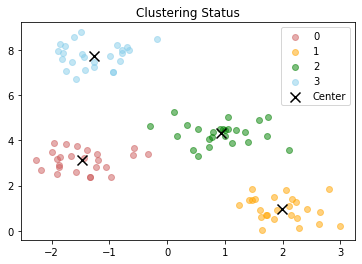

Test with seed:  5
Final Error:  134.9583863094452
Final Cluster: 


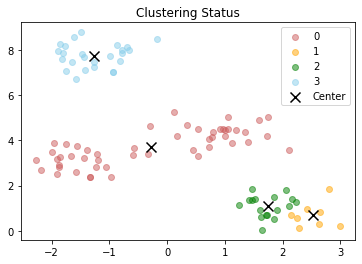

Best result amont different init results:  48.63378320706403


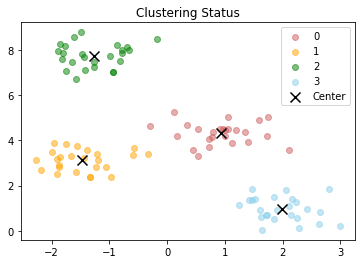

In [60]:
min_error, best_centroid, best_labels = 99999999999999 , None, None
for seed in [0,1,2,3,4,5]:
    centroids, labels , error= k_mean_train_test(X,k,100,tolerance,verbose = False,plotting = False, seed = seed)
    print('Test with seed: ', seed)
    print('Final Error: ', error)
    print('Final Cluster: ')
    plot_clusters(X,centroids,labels)
    if error < min_error:
        min_error = error
        best_centroid = centroids
        best_labels = labels

print('Best result amont different init results: ', min_error)
plot_clusters(X,best_centroid,best_labels)

### NOTE: So it can be seen that init center choice does affect the final result

# Kmean Prototype

In [61]:
class ScratchKMeans():
  """
  K-means scratch implementation
  Parameters
  ----------
  n_clusters : int
    Number of clusters
  n_init : int
    How many times to change the initial value of the center point for calculation
  max_iter : int
    Maximum number of iterations in one calculation
  tol : float
    Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
  verbose : bool
    True to output the learning process
  """
  def __init__(self, n_clusters, n_init, max_iter, tol, verbose=0, graphing = 0):
    self.n_clusters = n_clusters
    self.n_init = n_init
    self.iter = max_iter
    self.tol = tol
    self.verbose = verbose
    self.graphing = graphing
  def fit(self, X):
    """
    Calculate clustering by K-means
    Parameters
    ----------
    X : The following forms of ndarray, shape (n_samples, n_features)
        Features of training data
    """
    np.random.seed(0)
    seeds = np.arange(self.n_init)
    min_error = np.inf
    best_centroids, best_labels, best_seed = None, None, None
    for seed in seeds:
      if self.verbose > 0:
        print('----------------------------')
        print('Training With Seed: ', seed)

      centroids,labels,error = self._train_once(X,seed)
      if error < min_error:
        min_error = error
        best_centroids = centroids
        best_labels = labels
        best_seed = seed

      if self.verbose > 0:
        print('..TRAIN RESULT..')
        print('Training Eror: ', error)
        if self.graphing > 0: plot_clusters(X,centroids,labels, k = self.n_clusters, title = 'Training Result')
    
    self.centroids = best_centroids
    self.min_error = min_error
    self.labels = best_labels
    if self.verbose > 0:
      print('=================================')
      print('Final Error: ', min_error)
      print('Best init seed: ', best_seed)
      if self.graphing > 0: plot_clusters(X,best_centroids,best_labels, k = self.n_clusters, title = 'BEST CLUSTER')
      

  def _train_once(self,X, seed):
    centroids = self.random_centroids(X,seed)
    labels = self.assign_label(X,centroids)
    if self.verbose > 0:
      print('Init Settings:')
      print('Init SS-Error: ', self.sum_squared_error(X,centroids,labels))
      if self.graphing > 0: plot_clusters(X,centroids,labels,k = self.n_clusters, title = 'Initial n_clusters')

    for i in range(self.iter):
        centroids = self.move_centers(X,labels)
        labels = self.assign_label(X,centroids)
        error = self.sum_squared_error(X,centroids,labels)
        if self.verbose > 1:
            print('Ilteration: ', i)
            print('SS-Error: ', error)
            if self.graphing > 1: plot_clusters(X,centroids,labels,k = self.n_clusters)
        if self.sum_squared_error(X,centroids,labels) <= self.tol: break
    
    return centroids , labels, error
    
  
  def assign_label(self,X,C):
    distance = np.zeros((X.shape[0], C.shape[0]))
    for label, center in enumerate(C):
        distance[:,label] = norm(X - center.reshape(1, -1), axis = 1)
    return np.argmin(distance, axis = 1)
    
  def random_centroids(self,X,seed):
    np.random.seed(seed)
    choosen_indexes = np.sort(np.random.choice(np.arange(X.shape[0]), size = self.n_clusters, replace = False))
    return X[choosen_indexes]
  def move_centers(self,X, assigned_label):
    new_centers = []
    for label in range(self.n_clusters):
        cluster = X[assigned_label == label]
        new_centers.append(np.average(cluster, axis = 0))
    return np.array(new_centers)
  def sum_squared_error(self,X,C, assigned_labels):
    sum_error = 0
    for label, center in enumerate(C):
        sum_error += np.where(assigned_labels == label, 1, 0).reshape(-1,1) * (X - center.reshape(1,-1))**2
    return sum_error.sum()
  def predict(self, X):
    """
    Calculate which cluster the input data belongs to
    """
    pred = self.assign_label(X,self.centroids)
    return pred

----------------------------
Training With Seed:  0
Init Settings:
Init SS-Error:  460.15763952434145


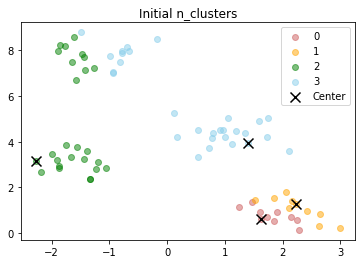

..TRAIN RESULT..
Training Eror:  32.769023914102675


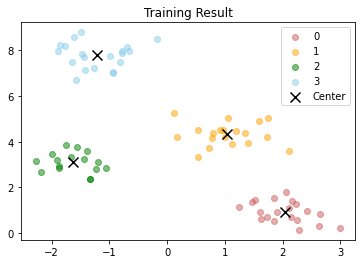

----------------------------
Training With Seed:  1
Init Settings:
Init SS-Error:  371.3963167797906


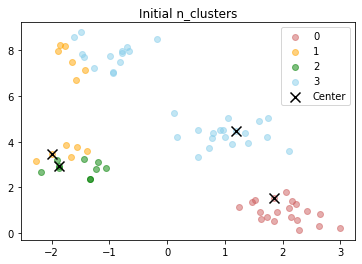

..TRAIN RESULT..
Training Eror:  32.769023914102675


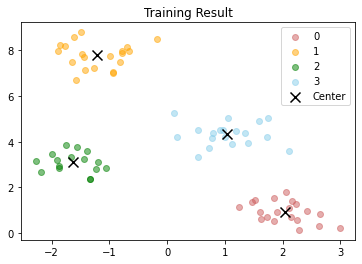

----------------------------
Training With Seed:  2
Init Settings:
Init SS-Error:  224.7801944105987


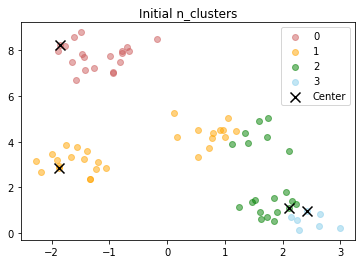

..TRAIN RESULT..
Training Eror:  32.769023914102675


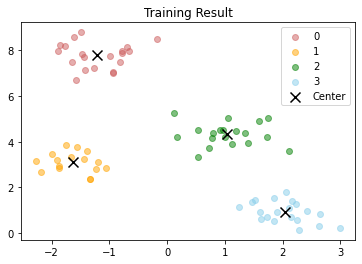

Final Error:  32.769023914102675
Best init seed:  0


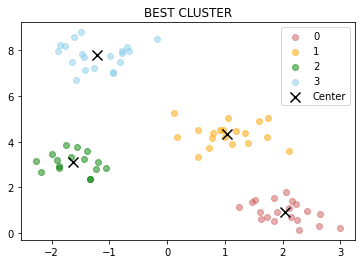

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test = train_test_split(X)
model = ScratchKMeans(4,3,100,1e-4,verbose = 1, graphing = 1)
model.fit(x_train)

# Problem 7
Estimation

[2 2 3 0 0 2 0 1 3 1 2 2 0 2 0 3 2 2 3 2 1 1 3 1 1]


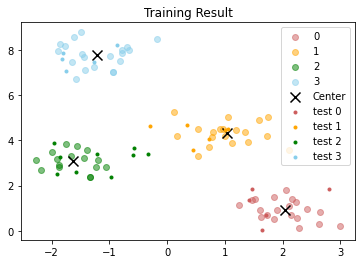

In [63]:
pred = model.predict(x_test)
print(pred)

C = model.centroids
plot_clusters(x_train,C,model.assign_label(x_train,C), x_test = x_test, y_test = pred, k = model.n_clusters, title = 'Training Result')

# Problem 8
Elbow Method

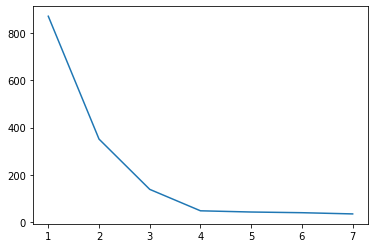

In [64]:
err = []
for k in range(1,8):
    model = ScratchKMeans(k,5,100,1e-4)
    model.fit(X)
    err.append(model.min_error)
plt.plot(range(1,8), err)
    
    

### NOTE: The elbow methods shows that error levels at around 4 clusters -> best n-cluster choice

# Problem 9
Silhouette diagram

In [65]:
from matplotlib import cm

def silhouette_diagram(silhouette_vals, silhouette_avg,y_km, cluster_labels,n_clusters):
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, cluster_labels + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.show()

# TODO: continue on silhouette and others!